In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
# Save config info

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "APPID=" + api_key + "&units=" + units + "&q="

lat = []
temp_max = []
humidity = []
cloudiness = []
windiness = []

date = (datetime.datetime.now():%Y-%m-%d)

print('Beginning Data Retrieval')
print('-----------------------------------------')


#Build query
for city in cities:
    
    #time delay
    time.sleep(1.001)
    
    #Get weather data
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()

    try:
        lat.append(weather_json['coord']['lat'])
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windiness.append(weather_json['wind']['speed'])

    except KeyError:
        print("City not found.  Skipping... ")
    
    print(f"Processing data for city = {city}.")

    

Beginning Data Retrieval
-----------------------------------------
Processing data for city = richards bay.
Processing data for city = ushuaia.
Processing data for city = harlingen.
Processing data for city = dakoro.
Processing data for city = arraial do cabo.
Processing data for city = arlit.
Processing data for city = bodden town.
Processing data for city = hobart.
Processing data for city = oyem.
Processing data for city = busselton.
Processing data for city = san lazaro.
Processing data for city = ribeira grande.
Processing data for city = tuktoyaktuk.
Processing data for city = haines junction.
Processing data for city = kapaa.
Processing data for city = punta arenas.
Processing data for city = kafanchan.
City not found.  Skipping... 
Processing data for city = sataua.
Processing data for city = barrow.
Processing data for city = catuday.
Processing data for city = upernavik.
City not found.  Skipping... 
Processing data for city = mys shmidta.
Processing data for city = walvis ba

Processing data for city = tucurui.
Processing data for city = clyde river.
City not found.  Skipping... 
Processing data for city = amderma.
Processing data for city = torbay.
Processing data for city = caravelas.
City not found.  Skipping... 
Processing data for city = vaitupu.
Processing data for city = kalevala.
Processing data for city = saskylakh.
Processing data for city = pagouria.
Processing data for city = habiganj.
Processing data for city = loa janan.
Processing data for city = constitucion.
Processing data for city = cherskiy.
Processing data for city = tazovskiy.
Processing data for city = vao.
Processing data for city = la ronge.
Processing data for city = assiniboia.
Processing data for city = novo aripuana.
Processing data for city = bhainsdehi.
Processing data for city = panalingaan.
Processing data for city = jiuquan.
Processing data for city = ponta delgada.
Processing data for city = san quintin.
Processing data for city = digby.
Processing data for city = gisborne

City not found.  Skipping... 
Processing data for city = karaul.
City not found.  Skipping... 
Processing data for city = geresk.
Processing data for city = pacific grove.
Processing data for city = montepuez.
Processing data for city = riyadh.
Processing data for city = nanortalik.
Processing data for city = namibe.
Processing data for city = vigrestad.
Processing data for city = cam ranh.
Processing data for city = maniitsoq.
Processing data for city = flin flon.
Processing data for city = kaoma.
Processing data for city = vilcun.
City not found.  Skipping... 
Processing data for city = satitoa.
Processing data for city = lubao.
Processing data for city = makhinjauri.
Processing data for city = uyemskiy.
Processing data for city = ouadda.
Processing data for city = longkou.
Processing data for city = san rafael del sur.
Processing data for city = yazoo city.
Processing data for city = kaura namoda.
Processing data for city = aksu.
Processing data for city = yunyang.
City not found.  

Processing data for city = lantawan.
Processing data for city = bowen.
Processing data for city = tongren.
Processing data for city = provost.
Processing data for city = manggar.
Processing data for city = dicabisagan.
Processing data for city = penzance.
Processing data for city = bilma.
Processing data for city = ketchikan.
Processing data for city = khao yoi.
Processing data for city = kenora.
Processing data for city = mnogovershinnyy.
City not found.  Skipping... 
Processing data for city = zachagansk.
Processing data for city = bria.
Processing data for city = dudinka.
Processing data for city = saulkrasti.
Processing data for city = campo maior.
City not found.  Skipping... 
Processing data for city = pemangkat.


In [8]:

weather_transposed = zip(lat,temp_max,humidity,cloudiness,windiness)
weather_df = pd.DataFrame(weather_transposed, columns=['Latitude','Max Temperature',
                                                       'Humidity','Cloudiness','Windiness'])

weather_df


,Latitude,Max Temperature,Humidity,Cloudiness,Windiness
0,-28.77,68.00,75,0,20.25
1,-54.81,44.60,45,40,11.41
2,53.18,60.01,93,75,19.46
3,14.51,95.36,26,67,3.66
4,-22.97,80.60,69,100,20.80
...,...,...,...,...,...
546,53.94,26.78,78,41,12.31
547,6.54,70.88,97,88,3.77
548,69.41,30.20,64,100,21.82
549,57.26,51.80,87,90,12.75


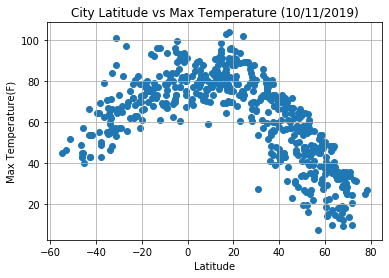

In [24]:
# Build a scatter plot for Latitude vs Max Temp
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

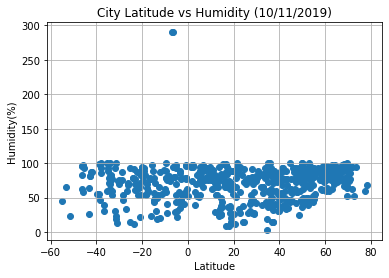

In [27]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

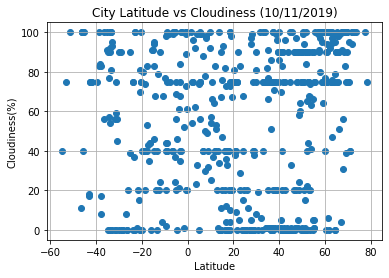

In [26]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

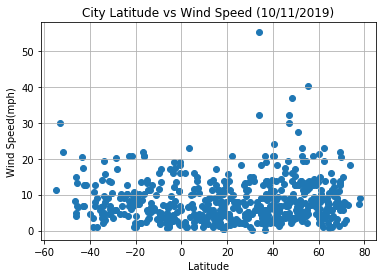

In [28]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Windiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [20]:
import datetime
f"Today's date is: {datetime.datetime.now():%m-%d-%Y}"

"Today's date is: 10-11-2019"